In [8]:
import pandas as pd
titanic_df=pd.read_csv("C:/Users/Meenakshi/Desktop/Machine Learning IIMB/data/titanic.csv")

In [11]:
col_list=['name','age']
titanic_df[col_list][0:2]


,name,age
0,"Allen, Miss Elisabeth Walton",29.0
1,"Allison, Miss Helen Loraine",2.0


In [13]:
titanic_df[['name','age']][0:2]

,name,age
0,"Allen, Miss Elisabeth Walton",29.0
1,"Allison, Miss Helen Loraine",2.0


In [14]:
titanic_df['survived'].value_counts()

0    864
1    449
Name: survived, dtype: int64

In [15]:
titanic_df['survived'].value_counts(normalize = True)

0    0.658035
1    0.341965
Name: survived, dtype: float64

###Survived Vs Sex

In [18]:
pd.crosstab(titanic_df.survived,titanic_df.sex,margins =True)

sex,female,male,All
survived,,,
0,156,708,864
1,307,142,449
All,463,850,1313


In [20]:
pd.crosstab(titanic_df.survived,titanic_df.sex,normalize = 'columns')

sex,female,male
survived,,
0,0.336933,0.832941
1,0.663067,0.167059


In [21]:
pd.crosstab(titanic_df.survived,titanic_df.sex,normalize='index')

sex,female,male
survived,,
0,0.180556,0.819444
1,0.683742,0.316258


In [23]:
pd.crosstab(titanic_df.survived,titanic_df.pclass,margins =True)

pclass,1st,2nd,3rd,All
survived,,,,
0,129,161,574,864
1,193,119,137,449
All,322,280,711,1313


In [26]:
pd.crosstab(titanic_df.survived,titanic_df.embarked.,margins =True)

embarked,Cherbourg,Queenstown,Southampton,All
survived,,,,
0,84,31,344,459
1,119,14,229,362
All,203,45,573,821


In [27]:
titanic_df['embarked'].unique()

array(['Southampton', 'Cherbourg', nan, 'Queenstown'], dtype=object)

In [29]:
titanic_df['embarked'].dropna().unique()

array(['Southampton', 'Cherbourg', 'Queenstown'], dtype=object)

In [35]:
titanic_clean_df=titanic_df.dropna(subset=['survived','pclass'], how='all')

### Age Distribution


In [37]:
import matplotlib.pyplot as plt

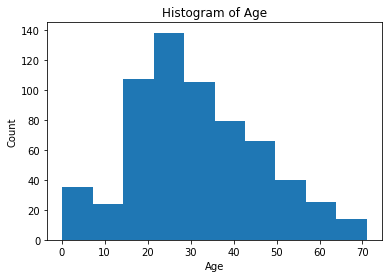

In [41]:
plt.hist(titanic_df.age.dropna())
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Histogram of Age");
plt.savefig("age.png")

(array([22., 13., 12., 12., 23., 84., 65., 73., 68., 37., 50., 29., 38.,
        28., 23., 17., 18.,  7.,  9.,  5.]),
 array([ 0.1667  ,  3.708365,  7.25003 , 10.791695, 14.33336 , 17.875025,
        21.41669 , 24.958355, 28.50002 , 32.041685, 35.58335 , 39.125015,
        42.66668 , 46.208345, 49.75001 , 53.291675, 56.83334 , 60.375005,
        63.91667 , 67.458335, 71.      ]),
 <a list of 20 Patch objects>)

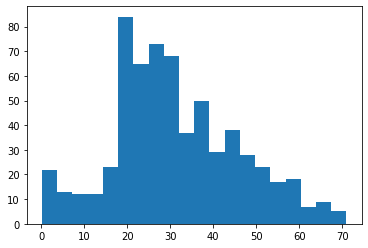

In [43]:
plt.hist(titanic_df.age.dropna(),bins=20)

### Average age of passengers in each class

In [44]:
titanic_df.groupby('pclass')['age'].mean()

pclass
1st    39.667773
2nd    28.300314
3rd    24.519658
Name: age, dtype: float64

In [45]:
avg_age_df=(titanic_df.groupby('pclass')['age']
            .mean()
            .reset_index())

In [46]:
avg_age_df

,pclass,age
0,1st,39.667773
1,2nd,28.300314
2,3rd,24.519658


In [47]:
avg_age_df.to_csv("avg.csv", index=False)

### Applying Lambda

In [49]:
titanic_df['gender']=(titanic_df['sex']
                      .map(lambda x: 1 if x=='male' else 0))

In [50]:
titanic_df[['sex','gender']][0:10]

,sex,gender
0,female,0
1,female,0
2,male,1
3,female,0
4,male,1
5,male,1
6,female,0
7,male,1
8,female,0
9,male,1


In [54]:
titanic_df[['sex','gender']].sample(5,
                                    random_state=100)

,sex,gender
173,female,0
517,male,1
1280,male,1
701,female,0
12,female,0
